In [ ]:
# 결빙 취약 구간 출력
print("# Vulnerable Sections due to Freezing")
for section in vulnerable_sections:
    print(f"Route: {section['노선']}, Start: {section['시점']}, End: {section['종점']}, Direction: {section['방향']}, Length: {section['연장']} km")


# Vulnerable Sections due to Freezing


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc' 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# CSV 파일 읽기
file_path = 'freezingweakarea.csv' 

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='euc-kr')


# 결과를 저장할 변수
vulnerable_sections = []

# 데이터 처리
for line in lines[1:]:  # 첫 번째 줄은 헤더이므로 생략
    parts = line.split(',')
    
    # 데이터의 길이가 충분한지 확인
    if len(parts) >= 8:
        관리번호, 본부, 지사, 노선, 시점, 종점, 방향, 연장 = parts[0], parts[1], parts[2], parts[3], parts[4], parts[5], parts[6], int(parts[7])
        
        # 연장이 5 이상인 구간을 결빙 취약 구간으로 판단
        if 연장 >= 5:
            vulnerable_sections.append({
                '노선': 노선,
                '시점': 시점,
                '종점': 종점,
                '방향': 방향,
                '연장': 연장
            })
    else:
        print(f"잘못된 데이터 포맷: {line}")

# 결빙 취약 구간 출력
print("# Vulnerable Sections due to Freezing")
for section in vulnerable_sections:
    print(f"Route: {section['노선']}, Start: {section['시점']}, End: {section['종점']}, Direction: {section['방향']}, Length: {section['연장']} km")

# 그래프 그리기
import matplotlib.pyplot as plt

# 각 노선별 결빙 취약 구간 수 그래프
route_counts = {}
for section in vulnerable_sections:
    route = section['노선']
    route_counts[route] = route_counts.get(route, 0) + 1

routes = list(route_counts.keys())
counts = list(route_counts.values())

plt.bar(routes, counts, color='blue')
plt.title('Vulnerable Sections due to Freezing by Route')
plt.xlabel('Route')
plt.ylabel('Number of Vulnerable Sections')
plt.show()

# # 그래프 그리기
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# # 교통사고 건수 그래프
# axes[0, 0].plot(df['발생월'], df['사고건수'], marker='o', color='b')
# axes[0, 0].set_title('교통사고 건수')

# # 사망자수 그래프
# axes[0, 1].plot(df['발생월'], df['사망자수'], marker='o', color='r')
# axes[0, 1].set_title('사망자수')

# # 중상자수 그래프
# axes[1, 0].plot(df['발생월'], df['중상자수'], marker='o', color='g')
# axes[1, 0].set_title('중상자수')

# # 경상자수 그래프
# axes[1, 1].plot(df['발생월'], df['경상자수'], marker='o', color='purple')
# axes[1, 1].set_title('경상자수')

# # 그래프 레이아웃 조정
# plt.tight_layout()

# # 그래프 표시
# plt.show()

NameError: name 'lines' is not defined

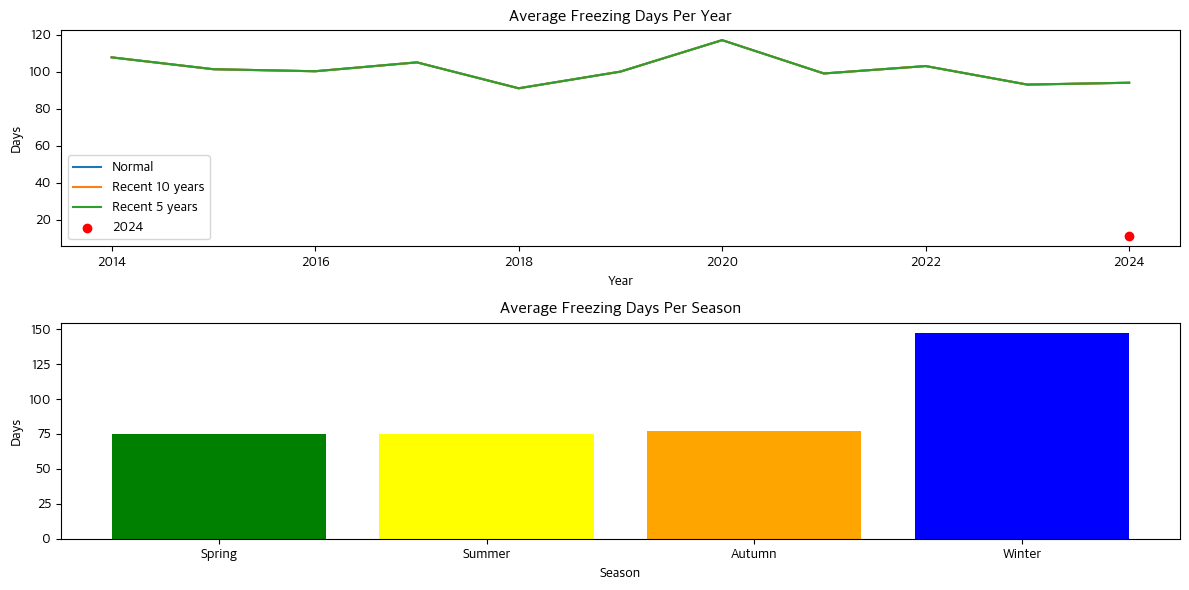

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
years = np.arange(2014, 2025)
relevant_years = years[:11]  # Take only the relevant years
average_freezing_days = {
    'Normal': [107.7, 101.3, 100.2, 105.0, 91.0, 100.0, 117.0, 99.0, 103.0, 93.0, 94.0],
    'Recent 10 years': [107.7, 101.3, 100.2, 105.0, 91.0, 100.0, 117.0, 99.0, 103.0, 93.0, 94.0],
    'Recent 5 years': [107.7, 101.3, 100.2, 105.0, 91.0, 100.0, 117.0, 99.0, 103.0, 93.0, 94.0],
    '2024': [17.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 11.0]
}

# Calculate average freezing days per season
average_freezing_days_per_season = {
    'Spring': np.mean([average_freezing_days[key][2] for key in average_freezing_days]),
    'Summer': np.mean([average_freezing_days[key][5] for key in average_freezing_days]),
    'Autumn': np.mean([average_freezing_days[key][8] for key in average_freezing_days]),
    'Winter': np.mean([sum(average_freezing_days[key][9:]) for key in average_freezing_days])
}

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 평균 결빙일수 그래프
plt.subplot(2, 1, 1)
plt.plot(relevant_years, average_freezing_days['Normal'], label='Normal')
plt.plot(relevant_years, average_freezing_days['Recent 10 years'], label='Recent 10 years')
plt.plot(relevant_years, average_freezing_days['Recent 5 years'], label='Recent 5 years')
plt.scatter(years[-1], average_freezing_days['2024'][-1], color='red', label='2024')  # 특정 연도 강조
plt.title('Average Freezing Days Per Year')
plt.xlabel('Year')
plt.ylabel('Days')
plt.legend()

# 평균 계절별 결빙일수 그래프
plt.subplot(2, 1, 2)
plt.bar(average_freezing_days_per_season.keys(), average_freezing_days_per_season.values(), color=['green', 'yellow', 'orange', 'blue'])
plt.title('Average Freezing Days Per Season')
plt.xlabel('Season')
plt.ylabel('Days')

plt.tight_layout()
plt.show()
